# Basic Natural Language Processing (NLP)
The world of nlp is very large.  This example is using a bag of words, n_gram approach, that often works well, but will typically have the problem of
+ 'the shark ate kids'
+ ' the kids ate shark'
Did the kids get eaten?

## NLP Work Flow

+ load data
+ split data
+ clean text
+ fit tokenzer
+ transform test and training sets
+ train model
+ eval on training and test sets


## Data 
+ Polirity data set, 1000 positive and 1000 negative movie reviews.
+ Download Polarity http://www.cs.cornell.edu/people/pabo/movie-review-data/
+ create a directory and move the downloaded tar.gz file to that directory
+ run this command (linux/ mac and maybe windows)
+ if this doesn't work withn windows, download and use 7zip to decompress the fill
```bash
 tar xzvf review_polarity.tar.gz
```


## Homework (for wednesday)
Identity and download a text data set to analyze sentiment on. 
you will create a sentiment analysis model using polarity data set,
+ data set should have at least 100 text sequences
+ you find the top five most negative and most positive examples
+ create a word cloud of a sample of the text data
+ create density plot of the out the positive negative reviews
+ add one additional plot for explanitory value
+ summarize findings



In [15]:
# load in data 
import os
import numpy as np
# define a function to read in text
def read_file_list(file_list):
    for file in file_list:
        with open(file, 'r') as f:
            text = f.readlines()
            text = ' '.join(text)
            yield text
# get the list of file paths
pos_dir = './data/polarity/txt_sentoken/pos'
neg_dir = './data/polarity/txt_sentoken/neg'
pos_files = os.listdir(pos_dir)
neg_files = os.listdir(neg_dir)
# data the working dir to the file paths
pos_files = [pos_dir + '/' + f for f in pos_files if 'cv' in f]
neg_files = [neg_dir + '/' + f for f in neg_files if 'cv' in f]
neg_reviews = list(read_file_list(neg_files))
pos_reviews = list(read_file_list(pos_files))
data = pos_reviews + neg_reviews
# positive 1, negative review 5
labels = np.array([1] * len(pos_reviews) + [0] * len(neg_reviews))

NLP Steps
'12 cleaning this text string !'
+ lower case everything
+ remove Symobls => '12 cleaning this text string'
+ remove numbers => 'cleaning this text string'
+ remove stop words => 'cleaning text string'
+ stemming (optional) => 'clean text string'
+ n_gram (optional), (text string) 
+ encoder with with one hot encoder or ftidgf 


In [16]:
print(data[-1])

two party guys bob their heads to haddaway's dance hit " what is love ? " 
 while getting themselves into trouble in nightclub after nightclub . 
 it's barely enough to sustain a three-minute _saturday_night_live_ skit , but _snl_ producer lorne michaels , _clueless_ creator amy heckerling , and paramount pictures saw something in the late night television institution's recurring " roxbury guys " sketch that would presumably make a good feature . 
 emphasis on the word " presumably . " 
 _a_night_at_the_roxbury_ takes an already-thin concept and tediously stretches it far beyond the breaking point--and that of viewers' patience levels . 
 the first five minutes or so of _roxbury_ play very much like one of the original " roxbury guys " skits . 
 with " what is love ? " 
 blaring on the soundtrack , the brotherly duo of doug and steve butabi ( chris kattan and will ferrell ) bob their heads , scope out " hotties " at clubs , and then bump a select few with violent pelvic thrusts . 
 the

In [19]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
# count vectorizer handels all these steps, setup some args for the count vect

# setup stop work list (to remove from docs)
stop_words = ['and', 'the', 'n', 't']
# setup n_gram ranges
ngram_range = (1, 1)
# drop words that show up 70% or more of the time
max_df = .7
# drop words that only show up less than 1% of the time
min_df = .001
max_features = 200
# init the count ce
c = CountVectorizer(stop_words=stop_words, ngram_range=ngram_range, max_df=max_df, min_df=min_df, 
                    max_features=max_features, binary=True )
features = c.fit_transform(data)
features = features.toarray()
feature_names = c.get_feature_names()
print(len(feature_names))
print(features.shape)

print(features)
print(feature_names)

200
(2000, 200)
[[1 0 0 ... 0 0 0]
 [0 0 0 ... 1 0 0]
 [1 0 0 ... 1 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 1 0 0]
 [0 0 0 ... 0 0 0]]
['acting', 'action', 'actors', 'actually', 'after', 'again', 'almost', 'along', 'also', 'although', 'always', 'another', 'any', 'anything', 'around', 'audience', 'away', 'back', 'bad', 'because', 'been', 'before', 'being', 'best', 'better', 'between', 'big', 'both', 'can', 'cast', 'character', 'characters', 'come', 'comedy', 'comes', 'could', 'course', 'day', 'did', 'director', 'do', 'does', 'doesn', 'don', 'down', 'during', 'each', 'end', 'enough', 'even', 'ever', 'every', 'fact', 'far', 'few', 'films', 'find', 'first', 'funny', 'get', 'gets', 'give', 'go', 'goes', 'going', 'good', 'great', 'had', 'hard', 'having', 'her', 'here', 'him', 'himself', 'how', 'however', 'if', 'instead', 'interesting', 'into', 'isn', 'its', 'john', 'just', 'know', 'last', 'least', 'life', 'little', 'long', 'look', 'lot', 'love', 'made', 'make', 'makes', 'making', 'man', 'ma

In [21]:
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
# fit gaussian nieve bayes model
model =  GaussianNB()

model.fit(features, labels)
preds = model.predict_proba(features)[:, 1]
preds_labels = model.predict(features)


# fit 
model2 = LogisticRegression(solver = 'lbfgs')
model2.fit(features, labels)
preds2 = model2.predict_proba(features)[:, 1]
preds2_labels = model2.predict(features)






In [83]:
from sklearn.metrics import classification_report, roc_auc_score
print('naieve bayes model')
print(classification_report(labels, preds_labels ))
print(roc_auc_score(labels, preds))

print('logistic regression')
print(classification_report(labels, preds2_labels ))
print(roc_auc_score(labels, preds2))


nieve bayes model
              precision    recall  f1-score   support

           0       0.74      0.76      0.75      1000
           1       0.75      0.73      0.74      1000

   micro avg       0.74      0.74      0.74      2000
   macro avg       0.74      0.74      0.74      2000
weighted avg       0.74      0.74      0.74      2000

0.824424
logistic regression
              precision    recall  f1-score   support

           0       0.78      0.78      0.78      1000
           1       0.78      0.78      0.78      1000

   micro avg       0.78      0.78      0.78      2000
   macro avg       0.78      0.78      0.78      2000
weighted avg       0.78      0.78      0.78      2000

0.8667940000000001


In [22]:
#test the system
def predict(data, model):
    features = c.transform(data).toarray()
    preds = model.predict_proba(features)
    return preds

test = ['I hate this class, make it stop, terrible awefull,  can not end fast enough',
 'this class is great, I love everything about it']

print('naieve bayes model')
print(predict(test, model))


print('logistic regression ')
print(predict(test, model2))


naieve bayes model
[[0.95855596 0.04144404]
 [0.84703415 0.15296585]]
logistic regression 
[[0.65664252 0.34335748]
 [0.42228512 0.57771488]]


In [87]:
# look at features
print('naieve bayes model')
y = model.theta_[0]
print(feature_names[np.argmax(y)])
print(feature_names[np.argmin(y)])

print('logistic regression')
y = model2.coef_
print(feature_names[np.argmax(y)])
print(feature_names[np.argmin(y)])


naieve bayes model
if
always
logistic regression
great
bad


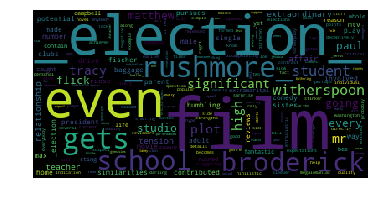

In [25]:
# Generate a word cloud
%matplotlib inline
from wordcloud import WordCloud
import matplotlib.pyplot as plt

word_string = data[1]
wordcloud = WordCloud().generate(word_string)

plt.imshow(wordcloud)
plt.axis('off')
plt.show()


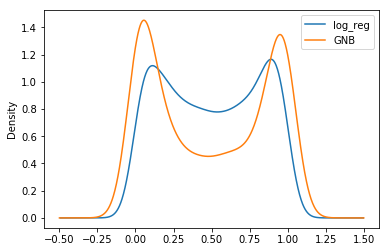

In [26]:
# plot the density

import pandas as pd
df = pd.DataFrame({'log_reg': preds2, 'GNB': preds})
df.plot.kde()
